## Exploration of The Training Data

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import json

from PIL import Image

#### Loading and Exploring <i>**annotation**<i/> data

In [2]:
## Loading the train image annotations
## this file is a json file

train_json = json.load(open('Data/train/iwildcam2021_train_annotations.json')) 

In [3]:
## json is a dict type
## these are the keys; we can conver this into a DataFrame
train_json.keys()

dict_keys(['images', 'annotations', 'categories'])

In [4]:
type(train_json)

dict

In [5]:
## there are 570 categories
## only contains the number and names of overall categories
train_json['categories']

[{'id': 0, 'name': 'empty'},
 {'id': 2, 'name': 'tayassu pecari'},
 {'id': 3, 'name': 'dasyprocta punctata'},
 {'id': 4, 'name': 'cuniculus paca'},
 {'id': 6, 'name': 'puma concolor'},
 {'id': 7, 'name': 'tapirus terrestris'},
 {'id': 8, 'name': 'pecari tajacu'},
 {'id': 9, 'name': 'mazama americana'},
 {'id': 10, 'name': 'leopardus pardalis'},
 {'id': 12, 'name': 'geotrygon montana'},
 {'id': 13, 'name': 'nasua nasua'},
 {'id': 14, 'name': 'dasypus novemcinctus'},
 {'id': 15, 'name': 'eira barbara'},
 {'id': 16, 'name': 'didelphis marsupialis'},
 {'id': 20, 'name': 'procyon cancrivorus'},
 {'id': 24, 'name': 'panthera onca'},
 {'id': 25, 'name': 'myrmecophaga tridactyla'},
 {'id': 26, 'name': 'tinamus major'},
 {'id': 32, 'name': 'sylvilagus brasiliensis'},
 {'id': 44, 'name': 'puma yagouaroundi'},
 {'id': 50, 'name': 'leopardus wiedii'},
 {'id': 62, 'name': 'mazama gouazoubira'},
 {'id': 67, 'name': 'philander opossum'},
 {'id': 70, 'name': 'capra aegagrus'},
 {'id': 71, 'name': 'bos

In [6]:
## looking at the images key
## there is about 203k images
len(train_json['images'])

203314

In [7]:
train_json['images'][:5]

[{'seq_num_frames': 6,
  'location': 3,
  'datetime': '2013-06-05 05:44:19.000',
  'id': '8b02698a-21bc-11ea-a13a-137349068a90',
  'seq_id': '30048d32-7d42-11eb-8fb5-0242ac1c0002',
  'width': 1920,
  'height': 1080,
  'file_name': '8b02698a-21bc-11ea-a13a-137349068a90.jpg',
  'sub_location': 0,
  'seq_frame_num': 0},
 {'seq_num_frames': 6,
  'location': 3,
  'datetime': '2013-06-05 05:44:20.000',
  'id': '8e5b81de-21bc-11ea-a13a-137349068a90',
  'seq_id': '30048d32-7d42-11eb-8fb5-0242ac1c0002',
  'width': 1920,
  'height': 1080,
  'file_name': '8e5b81de-21bc-11ea-a13a-137349068a90.jpg',
  'sub_location': 0,
  'seq_frame_num': 1},
 {'seq_num_frames': 6,
  'location': 3,
  'datetime': '2013-06-05 05:44:21.000',
  'id': '8c6be0e4-21bc-11ea-a13a-137349068a90',
  'seq_id': '30048d32-7d42-11eb-8fb5-0242ac1c0002',
  'width': 1920,
  'height': 1080,
  'file_name': '8c6be0e4-21bc-11ea-a13a-137349068a90.jpg',
  'sub_location': 0,
  'seq_frame_num': 2},
 {'seq_num_frames': 6,
  'location': 3,
  '

In [8]:
## contains cat annotations mapped to training image data
train_json['annotations'][:10]

[{'id': 'a292dd3c-21bc-11ea-a13a-137349068a90',
  'image_id': '96b00332-21bc-11ea-a13a-137349068a90',
  'category_id': 73},
 {'id': 'a0afcfc0-21bc-11ea-a13a-137349068a90',
  'image_id': '879d74d8-21bc-11ea-a13a-137349068a90',
  'category_id': 4},
 {'id': 'a306e9c0-21bc-11ea-a13a-137349068a90',
  'image_id': '9017f7aa-21bc-11ea-a13a-137349068a90',
  'category_id': 227},
 {'id': '9eed94c4-21bc-11ea-a13a-137349068a90',
  'image_id': '90d93c58-21bc-11ea-a13a-137349068a90',
  'category_id': 250},
 {'id': 'a2a4dd7a-21bc-11ea-a13a-137349068a90',
  'image_id': '887cd0ec-21bc-11ea-a13a-137349068a90',
  'category_id': 2},
 {'id': '9f159262-21bc-11ea-a13a-137349068a90',
  'image_id': '9137d902-21bc-11ea-a13a-137349068a90',
  'category_id': 233},
 {'id': 'a1b98046-21bc-11ea-a13a-137349068a90',
  'image_id': '9784a768-21bc-11ea-a13a-137349068a90',
  'category_id': 230},
 {'id': '9c3ec4aa-21bc-11ea-a13a-137349068a90',
  'image_id': '8a3643d2-21bc-11ea-a13a-137349068a90',
  'category_id': 233},
 {'id

In [9]:
## cannot convert the entire json file into a dataframe
#entire_df = pd.DataFrame(train_json)

#### Splitting JSON file into three seperate domains

This should make it easier to read and use only the data that I need

In [10]:
train_annotations = pd.DataFrame(train_json['annotations'])
train_images = pd.DataFrame(train_json['images'])
train_categories = pd.DataFrame(train_json['categories'])

#### Exloring the three different dataframes

In [11]:
train_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      205 non-null    int64 
 1   name    205 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [12]:
## this dataframe tell us the species information
train_categories.head()

,id,name
0,0,empty
1,2,tayassu pecari
2,3,dasyprocta punctata
3,4,cuniculus paca
4,6,puma concolor


In [13]:
train_categories.tail()

,id,name
200,566,sciurus sp
201,567,ave desconocida
202,568,aramides cajanea
203,570,aramus guarauna
204,571,mazama temama


In [14]:
train_annotations.head()

,id,image_id,category_id
0,a292dd3c-21bc-11ea-a13a-137349068a90,96b00332-21bc-11ea-a13a-137349068a90,73
1,a0afcfc0-21bc-11ea-a13a-137349068a90,879d74d8-21bc-11ea-a13a-137349068a90,4
2,a306e9c0-21bc-11ea-a13a-137349068a90,9017f7aa-21bc-11ea-a13a-137349068a90,227
3,9eed94c4-21bc-11ea-a13a-137349068a90,90d93c58-21bc-11ea-a13a-137349068a90,250
4,a2a4dd7a-21bc-11ea-a13a-137349068a90,887cd0ec-21bc-11ea-a13a-137349068a90,2


In [15]:
train_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203314 entries, 0 to 203313
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           203314 non-null  object
 1   image_id     203314 non-null  object
 2   category_id  203314 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.7+ MB


In [16]:
## checking to confirm there is annotated data for the images in the train_images dataframe
## there is; have to search train_annotations with image_id and not id

train_annotations [ train_annotations['image_id'] == '8b02698a-21bc-11ea-a13a-137349068a90']

,id,image_id,category_id
139605,9e8db252-21bc-11ea-a13a-137349068a90,8b02698a-21bc-11ea-a13a-137349068a90,380


In [17]:
## checking to see if the amount of images matches up with the train_images
train_annotations['image_id'].nunique()

203314

In [18]:
## checking to see what the class counts look like
train_annotations['category_id'].value_counts()

0      69487
372    16282
374    12408
96      8440
317     7414
       ...  
306        1
420        1
114        1
296        1
408        1
Name: category_id, Length: 205, dtype: int64

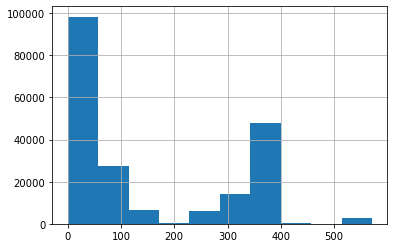

In [19]:
## visulizing what the class balance looks like
## very unbalanced 

train_annotations['category_id'].hist();

In [20]:
train_images.head(20)

,seq_num_frames,location,datetime,id,seq_id,width,height,file_name,sub_location,seq_frame_num
0,6,3,2013-06-05 05:44:19.000,8b02698a-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8b02698a-21bc-11ea-a13a-137349068a90.jpg,0.0,0
1,6,3,2013-06-05 05:44:20.000,8e5b81de-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8e5b81de-21bc-11ea-a13a-137349068a90.jpg,0.0,1
2,6,3,2013-06-05 05:44:21.000,8c6be0e4-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8c6be0e4-21bc-11ea-a13a-137349068a90.jpg,0.0,2
3,6,3,2013-06-05 05:44:22.000,8fdf7998-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,8fdf7998-21bc-11ea-a13a-137349068a90.jpg,0.0,3
4,6,3,2013-06-05 05:44:23.000,96093c50-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,96093c50-21bc-11ea-a13a-137349068a90.jpg,0.0,4
5,6,3,2013-06-05 05:44:23.000,97968e24-21bc-11ea-a13a-137349068a90,30048d32-7d42-11eb-8fb5-0242ac1c0002,1920,1080,97968e24-21bc-11ea-a13a-137349068a90.jpg,0.0,5
6,3,313,2013-07-25 12:16:33.000,8a8663bc-21bc-11ea-a13a-137349068a90,929aea96-21bc-11ea-a13a-137349068a90,2048,1536,8a8663bc-21bc-11ea-a13a-137349068a90.jpg,NaN,0
7,3,313,2013-07-25 12:16:37.000,929ae924-21bc-11ea-a13a-137349068a90,929aea96-21bc-11ea-a13a-137349068a90,2048,1536,929ae924-21bc-11ea-a13a-137349068a90.jpg,NaN,1
8,3,313,2013-07-25 12:16:41.000,8f2390a2-21bc-11ea-a13a-137349068a90,929aea96-21bc-11ea-a13a-137349068a90,2048,1536,8f2390a2-21bc-11ea-a13a-137349068a90.jpg,NaN,2
9,3,350,2013-06-22 14:10:26.000,8de8db2a-21bc-11ea-a13a-137349068a90,932b6724-21bc-11ea-a13a-137349068a90,2048,1536,8de8db2a-21bc-11ea-a13a-137349068a90.jpg,NaN,0


In [21]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203314 entries, 0 to 203313
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   seq_num_frames  203314 non-null  int64  
 1   location        203314 non-null  int64  
 2   datetime        203314 non-null  object 
 3   id              203314 non-null  object 
 4   seq_id          203314 non-null  object 
 5   width           203314 non-null  int64  
 6   height          203314 non-null  int64  
 7   file_name       203314 non-null  object 
 8   sub_location    27813 non-null   float64
 9   seq_frame_num   203314 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 15.5+ MB


In [22]:
## checking to see if there are any duplicate images / how many unique images in the train_images DF
train_images['file_name'].nunique()

203314

In [23]:
## taking a closer look at the seq_num_frames column
## what is the average number of series frames 


In [24]:
## Taking a look at the width and height of these images
train_images['width'].describe()

count    203314.000000
mean       1830.382089
std         310.470342
min        1280.000000
25%        1920.000000
50%        1920.000000
75%        2048.000000
max        3565.000000
Name: width, dtype: float64

In [25]:
max_width = max(train_images['width'])
print(f'The max width of an image is: {max_width}')

The max width of an image is: 3565


In [26]:
min_width = min(train_images['width'])
print(f'The min width of an image is: {min_width}')

The min width of an image is: 1280


In [27]:
max_height = max(train_images['height'])
print(f'The max height of an image is: {max_height}')

The max height of an image is: 2226


In [34]:
min_height = min(train_images['height'])
print(f'The min height of an image is: {min_height}')

The min height of an image is: 720


### Visualizing Images

In [ ]:
train_images.head()

In [5]:
## trying to visualize some images
## using 
im = Image.open('Data/train/train_mini/00659_Animalia_Arthropoda_Insecta_Hemiptera_Reduviidae_Zelus_tetracanthus/76eddbc8-40d4-43c4-9a07-271a1fb21c0b.jpg')

In [6]:
im.show()

#### Loading and Exploring <i>**MegaDetector**<i/> data

In [29]:
mega_json = json.load(open('Data/mega_res/iwildcam2021_megadetector_results.json'))

In [30]:
mega_json.keys()

dict_keys(['info', 'images', 'detection_categories'])

In [32]:
mega_json['images'][0]

{'detections': [{'category': '1',
   'bbox': [0.6529, 0.5425, 0.3471, 0.4038],
   'conf': 0.999}],
 'id': '905a3c8c-21bc-11ea-a13a-137349068a90',
 'max_detection_conf': 0.999}